# Problem Statment 

To predict the optimal price of the avacado using the previous data of avacado according to differnent regions.

Importinf neccesary library

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [9]:
df=pd.read_csv("Avocado.csv.zip")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory data analysis

In [10]:
#cheking dimention of dataset
df.shape

(18249, 14)

so the dataset contains 18249 rows and 14 columns

In [11]:
#cheking type of dataset
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

All column have flaot data type except the column date and region 

In [12]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


4046 = Hass – small
4225 = Hass – large
4770 = Hass Extra Large

first column is na index,so drop it out.

In [15]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df = df.rename(columns = {'4046':'small','4225':'large','4770':'Extra Large'})
df

,Date,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [20]:
#checking number of unique values in dataset
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
small           17702
large           18103
Extra Large     12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

So above are the nuber of unique values that each column has.

<AxesSubplot:>

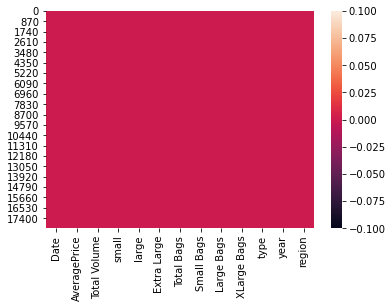

In [21]:
#since our dataset in cleaned that is no null value in the data set lets visualize this by heat map.
#Lets visualize null value clearly
sns.heatmap(df.isnull())

so clear that no missing value is present

In [23]:
#cheking which columns are present in dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'small', 'large', 'Extra Large',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

These are the columns present in data set

In [25]:
#list of values in target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [26]:
#cheking uniqness of values in targer varible 
df["AveragePrice"].unique

<bound method Series.unique of 0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64>

In [27]:
#cheking weather the dataset contains any spaces
df.loc[df["AveragePrice"]==""]

,Date,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


It seems there is no spaces in dataset

# Description of Data set

In [28]:
df.describe()

,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


This gives statistical information of the dataset.There is no any negative or invalid values in dataset. so from above we can conclude There is no any null value since the count of all columns is same.

split date column in to day and month

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']= df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)

In [33]:
df.head()

,Date,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Plotting Avacados Average Price

Text(0.5, 1.0, 'Average price')

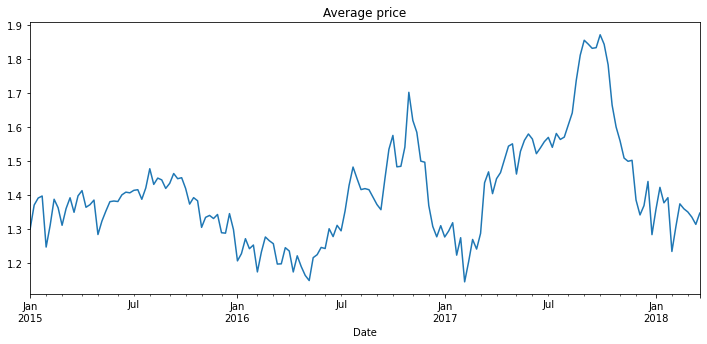

In [36]:
#plotting with respect to date
dategroup = df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average price')


 Average price is max at november

Text(0.5, 1.0, 'Average price by year')

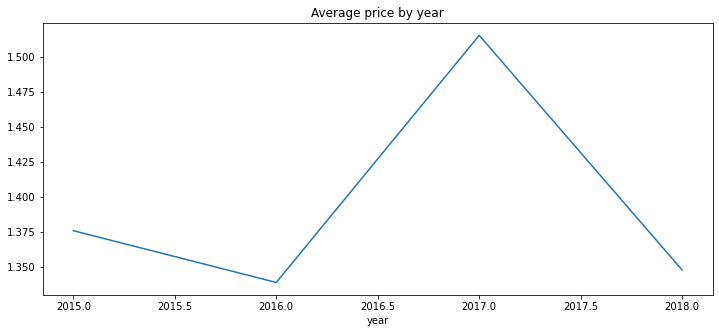

In [38]:
#plotting with respect to year
dategroup = df.groupby('year').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average price by year')


Text(0.5, 1.0, 'Average price by year')

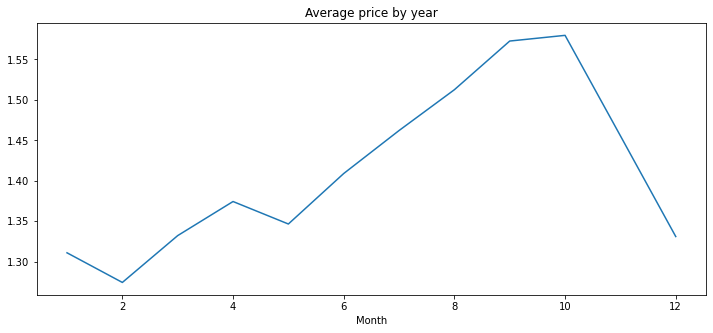

In [39]:
#plotting with respect to month
dategroup = df.groupby('Month').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average price by year')

conventional    9126
organic         9123
Name: type, dtype: int64


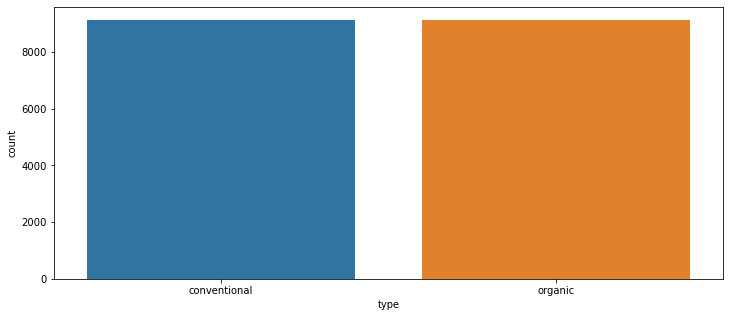

In [40]:
#avacado  observation spread with respect to type
print(df['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(df['type'])
plt.show()

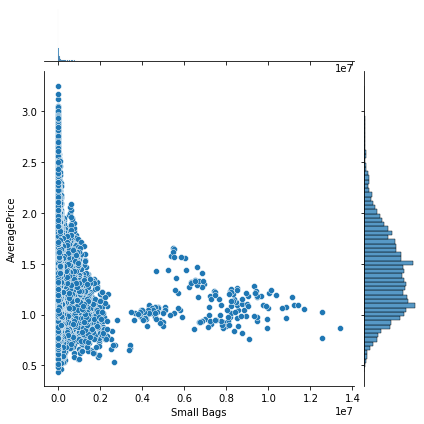

In [41]:
# average price spread for small bags
sns.jointplot(x='Small Bags',y='AveragePrice',data=df)

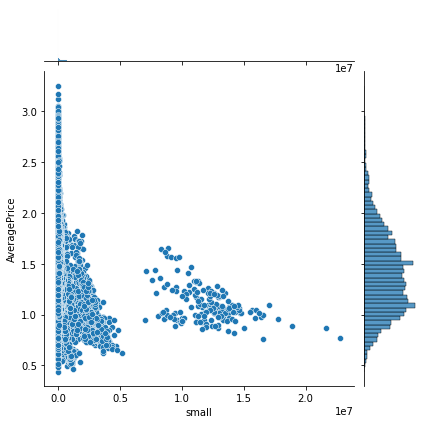

In [43]:
# average price plot against small 
sns.jointplot(x='small',y='AveragePrice',data=df)

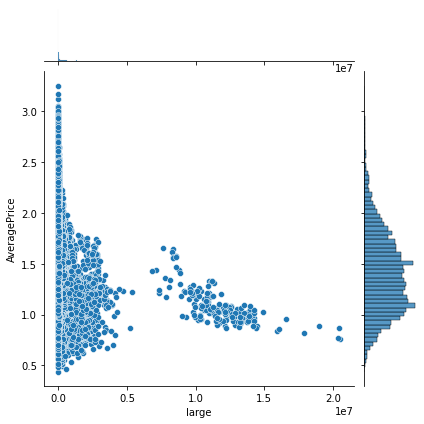

In [46]:
# average price plot against large
sns.jointplot(x='large',y='AveragePrice',data=df)

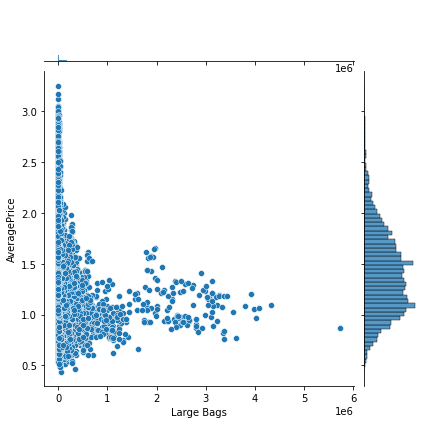

In [47]:
# average price plot against Large Bags 
sns.jointplot(x='Large Bags',y='AveragePrice',data=df)

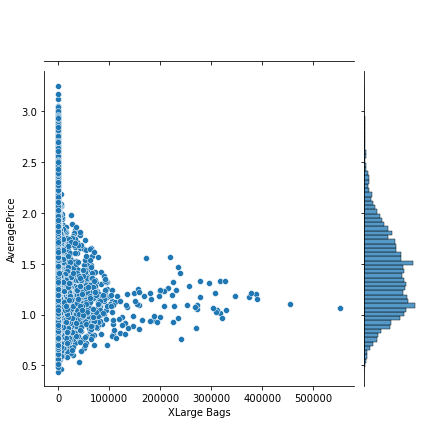

In [48]:
# average price plot against XLarge Bags 
sns.jointplot(x='XLarge Bags',y='AveragePrice',data=df)

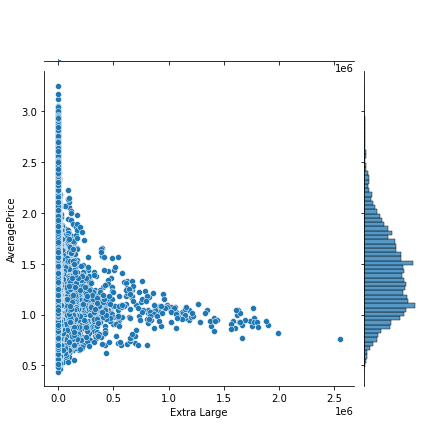

In [49]:
# average price plot against Extra Large
sns.jointplot(x='Extra Large',y='AveragePrice',data=df)

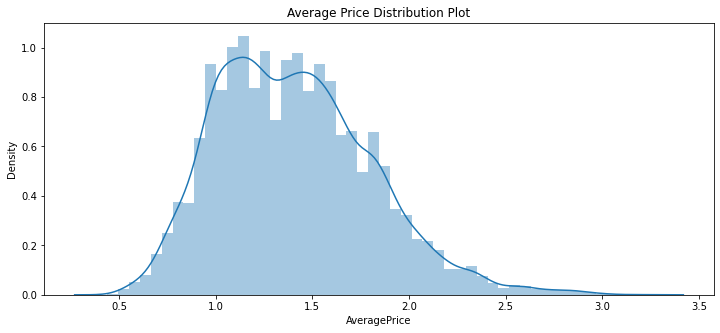

In [50]:
#Average price distribution plot
plt.figure(figsize=(12,5))
plt.title("Average Price Distribution Plot")
ax = sns.distplot(df["AveragePrice"])

In [51]:
#Correlation matrix
df.corr()


,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
small,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
large,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
Extra Large,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

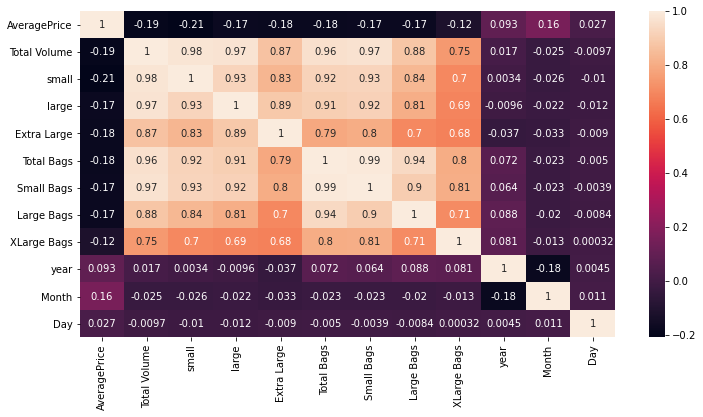

In [52]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)

Check categorical feature region

In [54]:
print(df['region'].unique())
print(df['region'].nunique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
54


In [55]:
print(df['type'].unique())
print(df['type'].nunique())

['conventional' 'organic']
2


 Dropping columns region and date 

In [58]:
new_df = pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [59]:
new_df.head()

,AveragePrice,Total Volume,small,large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


# Modelling

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [64]:
x = new_df.iloc[:,1:14]
y = new_df['AveragePrice']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

# Linear Regression 

In [67]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)



In [68]:
y_pred_train = LR.predict(x_train)

In [69]:
y_pred_test = LR.predict(x_train)

In [72]:
redLR = LR.predict(x_test)


#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predLR))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predLR))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predLR)))



MAE: 0.23300836996323712
MSE: 0.09056304033200906
RMSE: 0.3009369374669867


since RMSE is low ,so it is good model.

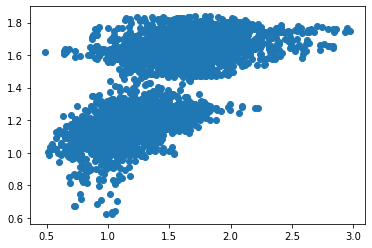

In [77]:
plt.scatter(x=y_test,y=pred)

As we observe that there is no straight line,so it cannot be ensured that this is best model that could be uplied on data.

# Decision Tree Regressor model

In [79]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [ ]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

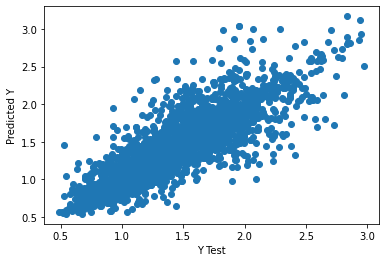

In [81]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can observe that we nearly have streight line ,and it seems to be better than the linear regression model ,and to be more surewe will chek RMSE

In [83]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.13408493150684933
MSE: 0.04366972602739726
RMSE: 0.20897302703314907


The RMSE from Decision Tree model is lower than the RMSE we got with Linear Regression model.

Now I will try with another model (Random Forest) to see my predictions could be improved for this data.



In [85]:
#random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred = rdr.predict(x_test)

In [86]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.09855736986301368
MSE: 0.020159299545205477
RMSE: 0.14198344813817376


We can observe that the RMSE from Random Forest model is lower than the Linear Regression and Decision Tree models, so the RandomForest is the best model in this case.

,Y Test,Pred
14192,2.11,1.8870
1873,0.98,1.0391
7293,1.17,1.3262
15087,1.78,1.4997
9888,1.61,1.8092


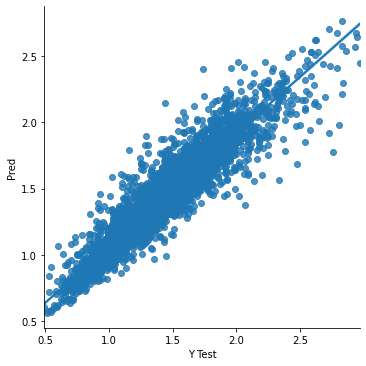

In [90]:
data = pd.DataFrame({'Y Test':y_test,'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Conclusion :Based on various model applied Random Forest seemes to be best model.